In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\mobile data.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [8]:
y.value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

# Extra Trees Classifier

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
extr = ExtraTreesClassifier()

In [11]:
extr.fit(x,y)

ExtraTreesClassifier()

In [12]:
feature_importance = extr.feature_importances_

In [13]:
imp_feature = pd.DataFrame(feature_importance, columns=["Gain_Score"])
cols = pd.DataFrame(x.columns, columns=["Feature_Names"])

gains = pd.concat([cols,imp_feature],axis=1)

In [14]:
gains

,Feature_Names,Gain_Score
0,battery_power,0.059407
1,blue,0.019693
2,clock_speed,0.034196
3,dual_sim,0.019464
4,fc,0.031769
5,four_g,0.017259
6,int_memory,0.035013
7,m_dep,0.033395
8,mobile_wt,0.037607
9,n_cores,0.034276


In [15]:
gains.nlargest(10,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.386497
0,battery_power,0.059407
12,px_width,0.049363
11,px_height,0.047743
8,mobile_wt,0.037607
15,sc_w,0.036245
14,sc_h,0.035530
16,talk_time,0.035325
6,int_memory,0.035013
10,pc,0.034600


In [16]:
gains.nsmallest(9,"Gain_Score")

,Feature_Names,Gain_Score
17,three_g,0.014393
5,four_g,0.017259
18,touch_screen,0.018598
3,dual_sim,0.019464
19,wifi,0.019625
1,blue,0.019693
4,fc,0.031769
7,m_dep,0.033395
2,clock_speed,0.034196


In [17]:
df.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [18]:
X = gains.nlargest(18,"Gain_Score")

In [19]:
X

,Feature_Names,Gain_Score
13,ram,0.386497
0,battery_power,0.059407
12,px_width,0.049363
11,px_height,0.047743
8,mobile_wt,0.037607
15,sc_w,0.036245
14,sc_h,0.035530
16,talk_time,0.035325
6,int_memory,0.035013
10,pc,0.034600


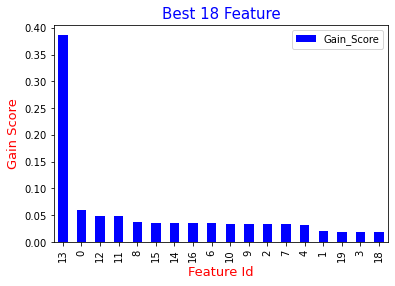

In [20]:
X.plot(kind='bar',color='b')
plt.title("Best 18 Feature", fontsize=15,color="b")
plt.xlabel("Feature Id",color='r',fontsize=13)
plt.ylabel("Gain Score",color='r',fontsize=13)
plt.show()

<AxesSubplot:>

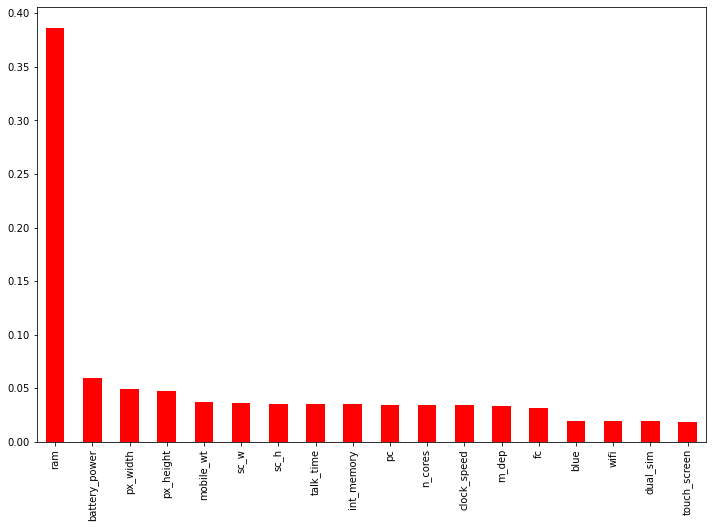

In [21]:
features_name = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(12,8))
features_name.nlargest(18).plot(kind='bar', color='r')

# Select K Best

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

In [23]:
FIT_FEATURES = SelectKBest(k=18,score_func=f_classif)

In [24]:
FIT_FEATURES.fit(x,y)

SelectKBest(k=18)

In [25]:
cols_ = pd.DataFrame(FIT_FEATURES.scores_ , columns=["Feature_Scores"])
cols_name = pd.DataFrame(x.columns, columns=['Feature_Names'])

scores = pd.concat([cols_name,cols_],axis=1)

In [26]:
scores

,Feature_Names,Feature_Scores
0,battery_power,31.190873
1,blue,0.459678
2,clock_speed,0.613019
3,dual_sim,0.489493
4,fc,0.830396
5,four_g,1.167108
6,int_memory,2.965758
7,m_dep,1.644102
8,mobile_wt,3.625213
9,n_cores,2.582847


# 18 best features based on SelectKBest

In [27]:
newX = scores.nlargest(18,'Feature_Scores')

In [28]:
newX

,Feature_Names,Feature_Scores
13,ram,3526.232362
0,battery_power,31.190873
12,px_width,22.520097
11,px_height,19.547371
8,mobile_wt,3.625213
6,int_memory,2.965758
9,n_cores,2.582847
14,sc_h,2.203504
16,talk_time,1.666576
7,m_dep,1.644102


In [29]:
# a new dataset for 18 best features
newDF = df.drop(['three_g' , 'touch_screen'],axis=1)
newDF.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,0,1


In [30]:
newx = newDF.drop('price_range',axis=1)
newy = newDF['price_range']

# train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(newx,newy, train_size=.70, random_state=1)

# Random forest 

In [33]:
# fitting model

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [34]:
rfc = RandomForestClassifier()

In [35]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [36]:
rfc.score(xtest,ytest)

0.8716666666666667

In [37]:
rfr = RandomForestRegressor()

In [38]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [39]:
rfr.score(xtest,ytest)

0.931956709372579

# KNN Regressor 

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
reg = KNeighborsRegressor()

In [42]:
reg.fit(xtrain,ytrain)

KNeighborsRegressor()

In [43]:
reg.score(xtest,ytest)

0.9484085901930723